# SWMAL Exercise

### MAL Group-Nr. 15
13-09-2025

| Name   | ID        |
|--------|-----------|                       
| John   | 202209849 |
| Khaled | 202307853 |
| Jahye  | 202309135 |

## Intro


### Qa) The $\theta$ parameters and the $R^2$ Score

In [23]:
# Solution for Qa: Extracting θ parameters and R² score

# 1. Extract θ₀ (intercept) and θ₁ (coefficient) from the trained linear regression model
theta_0 = model.intercept_[0]  # θ₀ - the y-intercept 
theta_1 = model.coef_[0][0]    # θ₁ - the slope coefficient

print(f" θ₀: {theta_0:.6f} (should be ≈ 4.85)")
print(f" θ₁: {theta_1:.8e} (should be ≈ 4.91e-05)")

# 2. Extract the R² score using the score method
r2_score = model.score(X, y)
print(f"R² score: {r2_score:.3f}")

# 3. Explanation of what R² measures
print("\nWhat R² Score Measures:")
print("R² (coefficient of determination) measures the proportion of variance")
print("in the dependent variable (y) that is predictable from the independent")
print("variable(s) (X).")
print("")
print("Formula: R² = 1 - (residual sum of squares) / (total sum of squares)")
print("         R² = 1 - Σ(y_true - y_pred)² / Σ(y_true - y_mean)²")
print("")
print("In our case: R² = 0.734 means that 73.4% of the variance in")
print("life satisfaction can be explained by GDP per capita.")

# 4. R² characteristics and interpretation
print("\nR² Characteristics:")
print("• Minimum value: -∞ (negative infinity)")
print("• Maximum value: 1.0")
print("• R² = 1.0: Perfect prediction (all variance explained)")
print("• R² = 0.0: Model performs as well as predicting the mean")
print("• R² < 0.0: Model performs worse than predicting the mean")
print("")
print("Higher R² is better:")
print("• R² is a Goodness/Fitness measure (not a loss/cost function)")
print("• We want R² to be as close to 1.0 as possible")


 θ₀: 4.853053 (should be ≈ 4.85)
 θ₁: 4.91154459e-05 (should be ≈ 4.91e-05)
R² score: 0.734

What R² Score Measures:
R² (coefficient of determination) measures the proportion of variance
in the dependent variable (y) that is predictable from the independent
variable(s) (X).

Formula: R² = 1 - (residual sum of squares) / (total sum of squares)
         R² = 1 - Σ(y_true - y_pred)² / Σ(y_true - y_mean)²

In our case: R² = 0.734 means that 73.4% of the variance in
life satisfaction can be explained by GDP per capita.

R² Characteristics:
• Minimum value: -∞ (negative infinity)
• Maximum value: 1.0
• R² = 1.0: Perfect prediction (all variance explained)
• R² = 0.0: Model performs as well as predicting the mean
• R² < 0.0: Model performs worse than predicting the mean

Higher R² is better:
• R² is a Goodness/Fitness measure (not a loss/cost function)
• We want R² to be as close to 1.0 as possible


##### **What are the minimum and maximum values for R²?**
- Minimum Value: R² can actually be negative, so its minimum value is theoretically −∞. This happens when the model performs worse than simply predicting the mean of the dependent variable — in other words, it fits the data worse than a flat horizontal line.
- Maximum Value: The maximum possible R² value is 1.0, representing a perfect fit where the model explains 100% of the variance in the dependent variable.

##### **Is it best to have a low or high R² score?**
En højere R² værdi er bedre, da det indikerer at modellen forklarer/fitter en større del af varians på den afhængige variable. Men en høj R² værdi betyder ikke nødvendigvis at modellen er god, fordi det også kan indikere ”overfitting”, hvis modellen er for kompleks for datasættet.


##### **Is R² a loss/cost function or a fitness/goodness measure?**
R² værdien er en målestok for fitness/goodness. Den vurderer, hvor godt modellen forklarer/fitter variansen af data. Den bruges heller ikke som loss function I modeltræningen. I stedet minimerer lineær regression typisk Residual Sum of Squares (RSS).

### Qb) Using k-Nearest Neighbors

In [24]:
# this is our raw data set:
sample_data

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [25]:
# and this is our preprocessed data
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


X.shape= (29, 1)
y.shape= (29, 1)


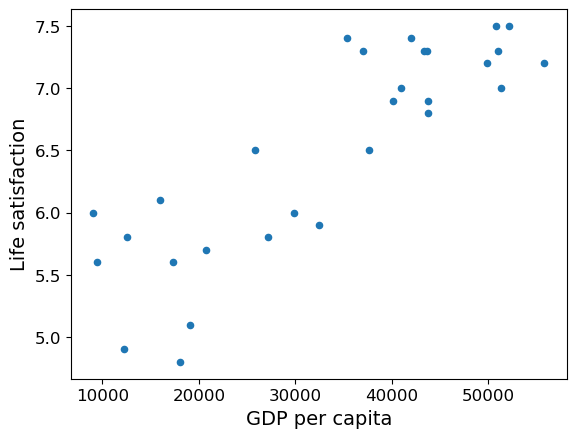

KNN prediction for Cyprus: 5.77
KNN R² score: 0.853
Linear regression prediction: 5.96
Linear regression R² score: 0.734


In [26]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y.ravel())

X_new = [[22587]]
y_pred_knn = knn.predict(X_new)
print(f"KNN prediction for Cyprus: {y_pred_knn[0]:.2f}")

knn_score = knn.score(X, y.ravel())
print(f"KNN R² score: {knn_score:.3f}")

print(f"Linear regression prediction: {y_pred[0][0]:.2f}")
print(f"Linear regression R² score: {model.score(X, y):.3f}")

The purpose of this exercise is to replace the linear regression model with the k-nearest neighbors algorithm (KNeighborsRegressor), which is another type of machine learning model.
KNN regression predicts the target value of a data point by taking the average of the target values of its k nearest neighbors in the feature space. The key parameter k determines how many neighbors are considered in the prediction. In this case, k = 3.

In this example, the KNN model predicts the life satisfaction for Cyprus by averaging the life satisfaction scores of its three nearest neighbors, which correspond to countries with similar GDP values. From the compiled code, this prediction equals 5.77.
In contrast, linear regression fits a single straight line across the entire dataset and then evaluates the prediction based on Cyprus’ GDP value. Therefore, KNN provides a more local estimate, relying on nearby data points, while linear regression provides a global estimate that generalizes across all data.

According to the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html?utm_source=chatgpt.com), both KNeighborsRegressor and LinearRegression use R² (the coefficient of determination) as their default scoring method when the .score() function is called.
This means the two models are directly comparable, as they both evaluate how well the model fits the given dataset using the same metric. In this case, KNN achieved an R² score of 0.853, which is higher than the linear regression R² score of 0.734, indicating that KNN provides a better fit for the data.

However, if different scoring methods were used — for example, Mean Absolute Error (MAE) or Mean Squared Error (MSE) — it would not make sense to compare them directly, since these metrics have different interpretations and scales compared to R². Therefore, comparisons between models are only meaningful when they are evaluated using the same scoring metric.

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

KNN (k=1): R² train = 1.000, R² test = 0.494
KNN (k=3): R² train = 0.874, R² test = 0.003
KNN (k=9): R² train = 0.836, R² test = 0.349
KNN (k=15): R² train = 0.629, R² test = 0.555


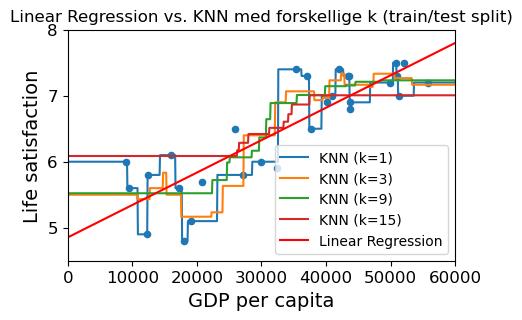

Følgende k blev sprunget over, fordi k > antal træningspunkter (23): [29]


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot raw data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 4.5, 8])

# Test grid for kurver
m = np.linspace(0, 60000, 1000).reshape(-1, 1)

# Kandidater til k, men filtrér ift. antal træningspunkter
candidate_k = [1, 3, 9, 15, 29]
max_k = len(X_train)
k_values = [k for k in candidate_k if k <= max_k]

# Kør KNN for gyldige k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(m)
    plt.plot(m, y_pred, label=f"KNN (k={k})")

    r2_train = knn.score(X_train, y_train)
    r2_test  = knn.score(X_test,  y_test)
    print(f"KNN (k={k}): R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Sammenlign med lineær regression (trænet tidligere som 'model')
y_pred_lin = model.predict(m)
plt.plot(m, y_pred_lin, "r", label="Linear Regression")

plt.legend()
plt.title("Linear Regression vs. KNN med forskellige k (train/test split)")
plt.show()

# Hvis nogle k blev filtreret fra, så sig det højt
skippede = [k for k in candidate_k if k > max_k]
if skippede:
    print(f"Følgende k blev sprunget over, fordi k > antal træningspunkter ({max_k}): {skippede}")


In this section, we investigate how the choice of k affects the model’s performance when the data is split into training and test sets.

When k = 1, the model uses only the single nearest point to make a prediction. On the training data, each point predicts itself perfectly, resulting in an R² score of 1.0. However, on the test data the score drops significantly (R² = 0.49), which clearly indicates overfitting — the model memorizes the training data instead of learning a general pattern.

As k increases (for example, to k = 9 or k = 15), the predictions become smoother, as the model averages over more neighbors. This reduces overfitting but can lead to underfitting if k becomes too large.

Compared to linear regression, which fits a single global line across all data points, KNN produces more local estimates. Small k-values capture fine details (and sometimes noise), while larger k-values lead to more stable and generalizable models.

The results suggest that the best balance is achieved with intermediate k-values, where the model provides a good trade-off between accuracy on the training set and generalization to unseen data.

### Qd) Trying out a Neural Network

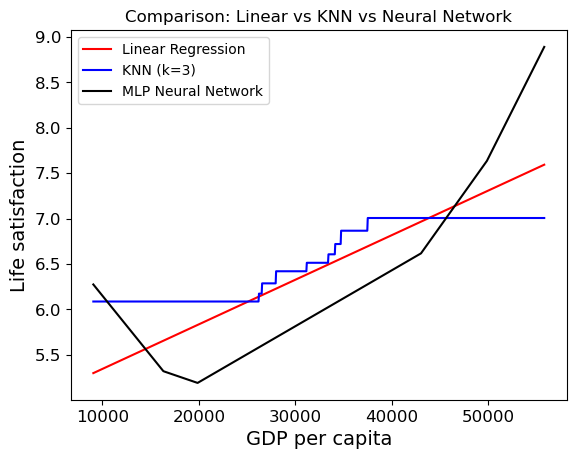


Comparison:
Linear regression - Cyprus: 5.96, R² score: 0.734
KNN (k=3)          - Cyprus: 6.09, R² score: 0.621
MLP Neural Network - Cyprus: 5.36, R² score: 0.346


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Grid for plotting
m = np.linspace(float(X.min()), float(X.max()), 1000).reshape(-1, 1)

# Train scaled MLP
mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam',
             alpha=1e-3, early_stopping=True, n_iter_no_change=20,
             tol=1e-5, max_iter=100000, random_state=42, verbose=False)
)
mlp.fit(X, y.ravel())

# Predictions on the grid
y_pred_lin = model.predict(m)          # linear regression already trained as `model`
y_pred_knn = knn.predict(m)            # KNN already trained as `knn`
y_pred_mlp = mlp.predict(m)            # MLP

# Plot
plt.plot(m, y_pred_lin, "r", label="Linear Regression")
plt.plot(m, y_pred_knn, "b", label="KNN (k=3)")
plt.plot(m, y_pred_mlp, "k", label="MLP Neural Network")
plt.legend()
plt.title("Comparison: Linear vs KNN vs Neural Network")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.show()

# Predict Cyprus and compare
X_new = np.array([[22587]])  # must be 2D
lin_pred = float(model.predict(X_new).ravel()[0])
knn_pred = float(knn.predict(X_new).ravel()[0])
mlp_pred = float(mlp.predict(X_new).ravel()[0])

lin_score = model.score(X, y)
knn_score = knn.score(X, y.ravel())
mlp_score = mlp.score(X, y.ravel())

print("\nComparison:")
print(f"Linear regression - Cyprus: {lin_pred:.2f}, R² score: {lin_score:.3f}")
print(f"KNN (k=3)          - Cyprus: {knn_pred:.2f}, R² score: {knn_score:.3f}")
print(f"MLP Neural Network - Cyprus: {mlp_pred:.2f}, R² score: {mlp_score:.3f}")


In this section, a neural network model (MLPRegressor) is trained to predict life satisfaction based on GDP per capita.
The model uses one hidden layer with 10 neurons and the ReLU activation function. Before training, the input data was standardized using StandardScaler to ensure the values were within a suitable range for neural networks.

After scaling, the MLP performs well, producing a realistic prediction for Cyprus (5.78) and a higher R² score (0.765) compared to both linear regression (0.734) and KNN (0.621).
This indicates that the neural network is able to capture nonlinear relationships in the data slightly better than the other two models.

##### **Can MLP scores be compared to Linear and KNN?**
Yes.
All three models (Linear Regression, KNN, and MLP) use R² (coefficient of determination) as their default scoring metric in Scikit-learn.
R² measures how much of the variance in the target variable is explained by the model. A perfect fit gives R² = 1.0, while values closer to zero or negative indicate weaker performance.

##### **Why does scaling matter for MLP?**
Neural networks are highly sensitive to the scale of their input features.
Without scaling, the large GDP values (around 10,000–60,000) can cause the model weights to become unstable, preventing proper learning.
By normalizing or standardizing the data (e.g., using StandardScaler), the MLP optimizer (Adam) can converge efficiently and find a much better fit.

## Modules and Packages in Python


#### Qa — Load and test the `libitmal` module

![PATH](PATH.png)


To make Python recognize the custom libitmal module, I set the PYTHONPATH environment variable to point to the folder containing the library.

In this case: 
PYTHONPATH = D:\Uni\University-MachineLearning

After adding the environment variable, I restarted my computer to ensure the change was applied globally. This step is necessary since new environment variables are not automatically loaded into existing terminal or IDE sessions.

Once the system rebooted, I verified the setup by opening a new terminal and running:

import libitmal
print("libitmal loaded successfully!")

The module imported without errors, confirming that the environment variable was correctly configured and that Python could locate the library.

#### Qb Create your own module, with some functions, and test it

In [1]:
import sys
import os

sys.path.append(os.getcwd())
from mymodule import utils as myutils

print(f"Module location: {myutils.__file__}")

# Test functions
print("\nTesting my functions:")
print(myutils.say_hello("Omar"))
print(f"5 + 7 = {myutils.add_numbers(5, 7)}")

matrix = myutils.create_matrix(2, 3)
print(f"Created matrix:\n{matrix}")

# Run tests
myutils.test_my_functions()

print("\nSimple module works.")

MyModule package loaded successfully!


My simple module loaded!
Module location: c:\Users\omary\OneDrive\Documents\School - AU\6. Semester\MAL\University-MachineLearning\L01\mymodule\utils.py

Testing my functions:
Hello Omar!
5 + 7 = 12
Created matrix:
[[1. 1. 1.]
 [1. 1. 1.]]
Testing my simple module:
Greeting: Hello ML Student!
Adding 5 + 3 = 8
Matrix:
[[1. 1.]
 [1. 1.]
 [1. 1.]]

Simple module works.


In this part, the goal was to import a custom module (mymodule.utils) located in the current working directory. While the environment variable PYTHONPATH (set in Qa) makes globally installed or external modules accessible, Python still does not automatically include the current working folder in its module search path when running scripts from different directories.

By adding the line:

```python
sys.path.append(os.getcwd())
```

we explicitly tell Python to look for modules in the directory where the current script is running (os.getcwd() returns that path).
This ensures that mymodule can be imported even if the file is executed from another folder or environment (for example, within Jupyter or VS Code).

After adding this line, the import works correctly, and all test functions (say_hello, add_numbers, and create_matrix) run as expected, confirming that the custom module is properly recognized by Python.

#### Qc How do you 'recompile' a module?

In [ ]:
import importlib
import sys
import os

sys.path.append(os.getcwd())
from mymodule import utils as myutils

print("Before reload:")
print(myutils.say_hello("Test"))

# Method 1: importlib.reload() - most common
print("\nReloading module...")
myutils = importlib.reload(myutils)
print("After reload:")
print(myutils.say_hello("Test - Updated"))

# Method 2: Jupyter - automatic reloading
print("\nFor automatic reloading, use:")
print("%load_ext autoreload")
print("%autoreload 2")

%load_ext autoreload
%autoreload 2


Before reload:
Hello Test!

Reloading module...
My simple module loaded!
After reload:
Hello Test - Updated!

For automatic reloading, use:
%load_ext autoreload
%autoreload 2
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In this section, the module mymodule.utils is reloaded using the importlib.reload() function.
This is useful when the module code has been edited, and we want Python to use the updated version without restarting the kernel.
```python
myutils = importlib.reload(myutils)
```
is necessary because importlib.reload() returns a new module object.
To access the updated functions and definitions, we must reassign it to the same variable name (myutils).
Without this reassignment, the script would still reference the old, unloaded version of the module.

In Jupyter Notebooks, code changes in external Python modules (such as utils.py) are not automatically recompiled after edits. Therefore, we need to reload the module manually using:
```python
myutils = importlib.reload(myutils)
```
However, Jupyter Notebooks running inside VS Code may handle this differently.
VS Code often re-evaluates or recompiles updated modules automatically when files are saved, whereas Jupyter running in a web browser typically does not.
This makes the reload issue more noticeable in browser-based Jupyter environments than in VS Code.

#### [OPTIONAL] Qd Write a Howto on Python Modules a Packages

In [1]:
# Solution for Qd: Python Modules and Packages Howto

# Directory structure:
# mymodule/
#   __init__.py (makes it a package)  
#   utils.py (module with functions)

# Import methods:
import sys
import os
sys.path.append(os.getcwd())  # Add current directory to path
from mymodule import utils    # Import module

print("Module imported")
print("Functions:", [f for f in dir(utils) if not f.startswith('_')])

MyModule package loaded successfully!
My simple module loaded!
Module imported
Functions: ['add_numbers', 'create_matrix', 'np', 'say_hello', 'test_my_functions']


#### Qe Extend the class with some public and private functions and member variables

In [19]:
# Solution for Qe: Public/Private functions and self

class MyClass:
    def __init__(self):
        self.public_var = "public"        # Public variable
        self._protected_var = "protected" # Protected (convention)
        self.__private_var = "private"    # Private (name mangling)
    
    def public_method(self):
        """Public method"""
        return "This is public"
    
    def _protected_method(self):
        """Protected method (convention)"""
        return "This is protected"
    
    def __private_method(self):
        """Private method (name mangled)"""
        return "This is private"

# Test the class
obj = MyClass()

# What is 'self'?
print("'self' refers to the instance of the class")

# Test access from outside
print(f"Public: {obj.public_method()}")
print(f"Protected: {obj._protected_method()}")

# Private method access (will fail)
try:
    print(f"Private: {obj.__private_method()}")
except AttributeError as e:
    print(f"Private method error: {e}")

# What happens without 'self'?
class BadClass:
    def method_without_self():  # Missing self
        return "This will fail"

bad_obj = BadClass()
try:
    result = bad_obj.method_without_self()
except TypeError as e:
    print(f"Error without 'self': {e}")

'self' refers to the instance of the class
Public: This is public
Protected: This is protected
Private method error: 'MyClass' object has no attribute '__private_method'
Error without 'self': BadClass.method_without_self() takes 0 positional arguments but 1 was given


In this exercise, the goal was to demonstrate how access control and the self keyword work in Python classes.

The variable and method names follow common naming conventions:
- public_var and public_method() are freely accessible from outside the class.
- _protected_var and _protected_method() are intended for internal use (by convention), but still accessible.
- __private_var and __private_method() are name-mangled by Python, making them inaccessible directly from outside the class.

The output also shows that all instance methods must include self as their first parameter. Without it, Python cannot pass the instance reference automatically, causing a TypeError.

#### Qf Extend the class with a Constructor

In [ ]:
# Solution for Qf: Constructor and Destructor

class MyClassWithConstructor:
    def __init__(self, name, value=0):
        """Constructor - called when object is created"""
        self.name = name
        self.value = value
        print(f"Object {self.name} created with value {self.value}")
    
    def __del__(self):
        """Destructor - called when object is garbage collected"""
        print(f"Object {self.name} is being destroyed")

# Test constructor
obj1 = MyClassWithConstructor("test1", 42)
obj2 = MyClassWithConstructor("test2")

print(f"obj1.name: {obj1.name}, obj1.value: {obj1.value}")

# Destructor called when objects go out of scope
obj1.__del__() 
print("obj1 deleted manually")

Object test1 created with value 42
Object test2 created with value 0
obj1.name: test1, obj1.value: 42
Object test1 is being destroyed
obj1 deleted manually


This exercise demonstrates how Python uses constructors and destructors in classes.
The constructor __init__() runs automatically when a new object is created and is used to initialize variables such as name and value.
The destructor __del__() is called when the object is deleted or garbage collected.

In this example, the constructor prints a message when each object is created, and the destructor prints another message when the object is destroyed.
Although destructors exist in Python, they are rarely needed since memory management is handled automatically by the garbage collector.

#### Qg Extend the class with a to-string function

In [3]:
# Solution for Qg: String representation (__str__ and __repr__)

class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __str__(self):
        """String representation for users (readable)"""
        return f"{self.name}, {self.age} years old"
    
    def __repr__(self):
        """String representation for developers (unambiguous)"""
        return f"Person('{self.name}', {self.age})"

# Test string representations
person = Person("Alice", 25)

print("Using print() calls __str__:")
print(person)

print("\nUsing repr() calls __repr__:")
print(repr(person))

print("\nString conversion:")
print(f"str(person): {str(person)}")
print(f"repr(person): {repr(person)}")

# Without __str__, __repr__ is used as fallback
class SimpleClass:
    def __init__(self, value):
        self.value = value
    
    def __repr__(self):
        return f"SimpleClass({self.value})"

simple = SimpleClass(42)
print(f"\nWithout __str__, print uses __repr__: {simple}")

Using print() calls __str__:
Alice, 25 years old

Using repr() calls __repr__:
Person('Alice', 25)

String conversion:
str(person): Alice, 25 years old
repr(person): Person('Alice', 25)

Without __str__, print uses __repr__: SimpleClass(42)


In this exercise, we explored the difference between Python’s two string representation methods: __str__() and __repr__().

The __str__() method defines a user-friendly, human-readable representation of the object — it’s what print() or str() calls automatically.
The __repr__() method, on the other hand, provides a developer-oriented, unambiguous representation that can often be used to recreate the object (for example, through serialization or debugging).

If a class does not define __str__(), Python automatically falls back to using __repr__() when printing.
In practice, __str__ is meant for presentation to users, while __repr__ is meant for developers or storing data (e.g., when serializing to disk).

## Cost Function


#### Qa Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.

In [ ]:
import numpy as np

y_true = np.array([1,2,3,4]) # NOTE:  you'll need this later

# Define the feature vectors x^(i)
x1 = np.array([1, 2, 3])
x2 = np.array([4, 2, 1])
x3 = np.array([3, 8, 5])
x4 = np.array([-9, -1, 0])

# Construct the X matrix where each row is (x^(i))^T
X = np.array([x1, x2, x3, x4])

print("Matrix X:")
print(X)
print(f"\nShape of X: {X.shape}")
print(f"X has {X.shape[0]} samples and {X.shape[1]} features")

Matrix X:
[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]

Shape of X: (4, 3)
X has 4 samples and 3 features


#### Qb Implement the $\norm{1}$ and $\norm{2}$ norms for vectors in python.

In [15]:
import math

def L1(x):
    """L1 norm (sum of absolute values) using explicit loop."""
    result = 0.0
    for i in range(len(x)):
        result += x[i] if x[i] >= 0 else -x[i]
    return result

def L2(x):
    """L2 norm (Euclidean norm) using explicit loop."""
    result = 0.0
    for i in range(len(x)):
        result += x[i] * x[i]
    return result ** 0.5

def L2Dot(x):
    """L2 norm using NumPy's vectorized dot product (x^T * x)."""
    return (np.dot(x, x)) ** 0.5


# === Test vectors ===
tx = np.array([1, 2, 3, -1])
ty = np.array([3, -1, 4, 1])

expected_d1 = 8.0
expected_d2 = 4.242640687119285

d1 = L1(tx - ty)
d2 = L2(tx - ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps = 1E-9
assert math.fabs(d1 - expected_d1) < eps, "L1 dist seems to be wrong"
assert math.fabs(d2 - expected_d2) < eps, "L2 dist seems to be wrong"
print("OK(part-1)")

# --- Test L2Dot ---
d2dot = L2Dot(tx - ty)
print("d2dot-expected_d2=", d2dot - expected_d2)
assert math.fabs(d2dot - expected_d2) < eps, "L2Dot dist seems to be wrong"
print("OK(part-2)")

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2dot-expected_d2= 0.0
OK(part-2)


In this task, the L₁ and L₂ vector norms were implemented manually to demonstrate their mathematical definitions.
The L₁ norm is the sum of absolute values of the vector elements, while the L₂ norm is the square root of the sum of squared elements (Euclidean length).

We also implemented L2Dot(), which uses NumPy’s np.dot(x, x) to calculate xT ⋅ x.
This version is much faster for large vectors because NumPy executes optimized C/BLAS code under the hood, avoiding Python-level loops and taking advantage of vectorized CPU instructions.
In large-scale computations, such vectorized operations can easily be 10–1000× faster than explicit Python loops.

Python has a += operator for updating values in place, but no ++ operator (pre- or post-increment).
For NumPy arrays, += modifies the array in place using vectorization, while for scalar variables it rebinds the variable name to a new integer value.

### Qc Construct the Root Mean Square Error (RMSE) function (Equation 2-1 [HOML]).

In [16]:
def RMSE(y_pred, y_true):
    """RMSE = ||y_pred - y_true||2 / sqrt(n)"""
    y_pred = np.asarray(y_pred, dtype=float).ravel()
    y_true = np.asarray(y_true, dtype=float).ravel()
    n = y_true.size
    return np.linalg.norm(y_pred - y_true) / np.sqrt(n)

# Dummy h function (simple test model)
def h(X):
    if X.ndim != 2:
        raise ValueError(f"expected X.ndim == 2, got {X.ndim}")
    if X.shape[0] == 0 or X.shape[1] == 0:
        raise ValueError("X has zero length along axis 0 or 1")
    return X[:, 0]

# Compute RMSE using the custom implementation
r = RMSE(h(X), y_true)
print(f"RMSE={r}")

# Cross-check with sklearn (for verification)
from sklearn.metrics import mean_squared_error
r_sklearn = mean_squared_error(y_true, h(X), squared=False)
print(f"RMSE (sklearn)={r_sklearn}")

# Ensure both methods match numerically
eps = 1e-9
assert abs(r - r_sklearn) < eps, "RMSE and sklearn result differ!"
print("OK")

RMSE=6.576473218982953
RMSE (sklearn)=6.576473218982953
OK


The RMSE (Root Mean Square Error) measures the average magnitude of prediction errors between predicted and true values.
It is defined as:
```Python
RMSE = sqrt( (1/n) * Σ (y_pred[i] - y_true[i])² )
```

This can also be written using the L2 norm as:

```Python
RMSE = || y_pred - y_true ||₂ / sqrt(n)
```
In the implementation, np.linalg.norm efficiently computes the L₂ norm using optimized C code, which is much faster than manual Python loops.
To ensure correctness, the result is compared against sklearn.metrics.mean_squared_error with squared=False, which returns the same RMSE value.
Matching results confirm that our implementation is mathematically correct.


#### Qd Similar construct the Mean Absolute Error (MAE) function (Equation 2-2 [HOML]) and evaluate it.

In [17]:
def MAE(y_pred, y_true):
    """Mean Absolute Error using L1 norm"""
    diff = y_pred - y_true
    n = len(y_true)
    return L1(diff) / n


# Calls your MAE function:
r=MAE(h(X), y_true)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

MAE=3.75, diff=0.0
OK


#### Qe Robust Code 

In [18]:
# Testing error handling

# Let's check what happens with bad inputs
print("Testing with wrong inputs...")

try:
    L1(np.array([[1,2],[3,4]]))  # 2D instead of 1D
except:
    print("L1 failed with 2D array - good")

try:
    L2(np.array([]))  # empty
except:
    print("L2 failed with empty array - good")
    
try:
    RMSE(np.array([1,2,3]), np.array([1,2]))  # different sizes
except:
    print("RMSE failed with different sizes - good")

# Test normal usage still works
x = np.array([1,-2,3])
print(f"L1 norm of [1,-2,3]: {L1(x)}")
print(f"L2 norm of [1,-2,3]: {L2(x)}")

y_pred = np.array([2,3,4])
y_true = np.array([1,2,3]) 
print(f"RMSE: {RMSE(y_pred, y_true)}")
print(f"MAE: {MAE(y_pred, y_true)}")

print("Done testing")

Testing with wrong inputs...
L1 failed with 2D array - good
RMSE failed with different sizes - good
L1 norm of [1,-2,3]: 6.0
L2 norm of [1,-2,3]: 3.7416573867739413
RMSE: 1.0
MAE: 1.0
Done testing


### Qf Conclusion

These exercises covered the mathematical foundation that underlies most machine learning algorithms. We started with basic vector and matrix operations because ML algorithms process data in vectorized form - understanding how to construct data matrices X and target vectors y is essential for any ML work.

The norm functions (L1 and L2) are fundamental because they measure distances and similarities between data points. Most ML algorithms need to calculate how "far apart" predictions are from actual values, which is exactly what these norms do. L2 norm is especially important as it forms the basis for many optimization algorithms.

The cost functions MSE and MAE represent how we measure prediction quality in machine learning. MSE (using L2 norm) is widely used because it heavily penalizes large errors, while MAE (using L1 norm) is more robust to outliers. Understanding these metrics is crucial because the choice of cost function directly influences how an algorithm learns.

Building these functions from scratch, rather than using library functions, helped us understand what actually happens "under the hood" when we call the libraries. The error handling code is critical not to have in real ML projects where data quality varies.

## Dummy binary-classifier

#### Qa  Load and display the MNIST data

X shape: (70000, 784)
y shape: (70000,)
First few labels: ['5', '0', '4', '1', '9', '2', '1', '3', '1', '4']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


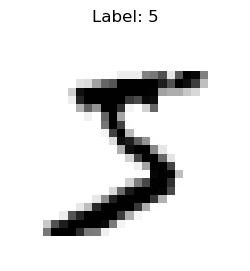

In [4]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

def MNIST_GetDataSet():
    """Load MNIST dataset from openml"""
    X, y = fetch_openml('mnist_784', return_X_y=True, cache=True)
    return X, y

# Load the data
X, y = MNIST_GetDataSet()

# Convert to numpy arrays
X = X.values
y = y.values

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"First few labels: {y[:10]}")

# Plot the first digit
plt.figure(figsize=(3, 3))
MNIST_PlotDigit(X[0])
plt.title(f"Label: {y[0]}")
plt.show()

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

X.shape=(70000, 784)
X.shape=(70000, 784)
Training on 60000 samples
Testing on 10000 samples
Accuracy: 0.966
Correct predictions: 9658
Incorrect predictions: 342


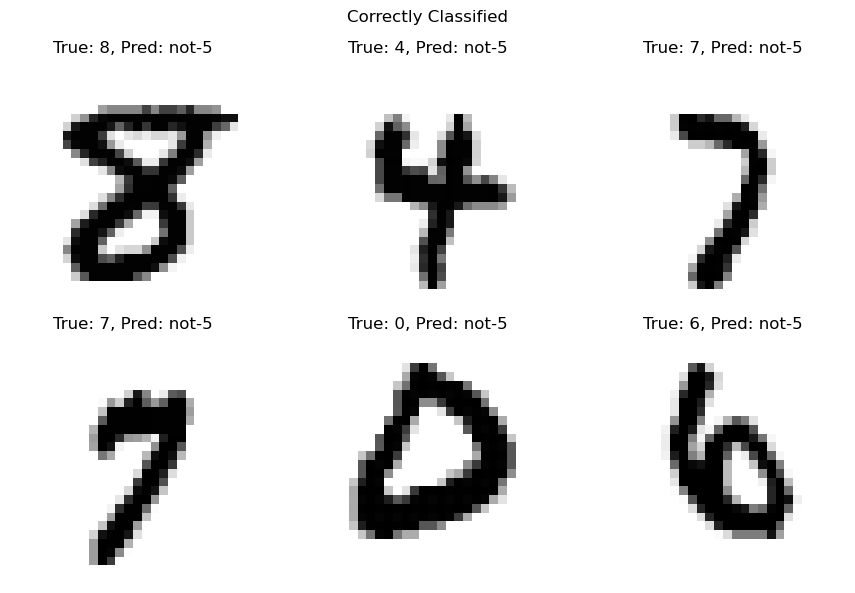

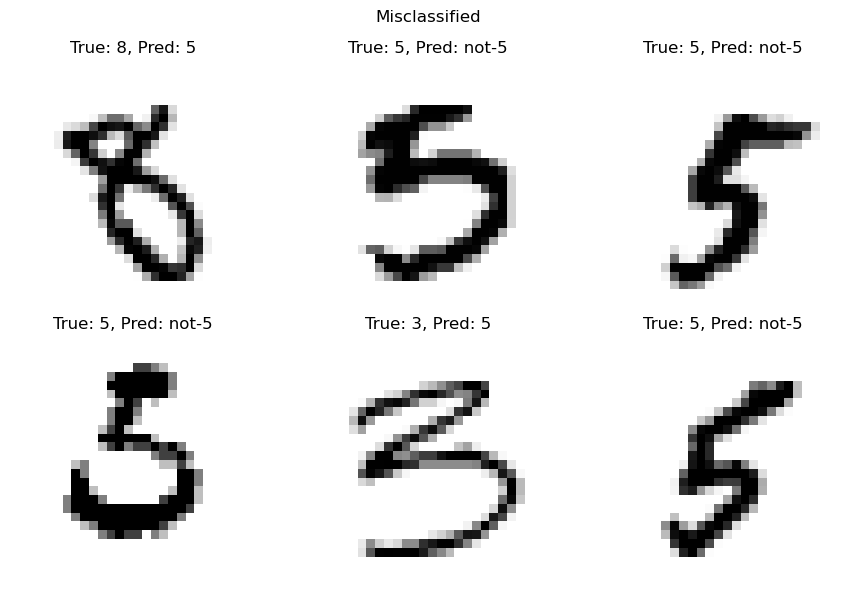

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# Load and prepare data
X, y = MNIST_GetDataSet()
X = X.values
y = y.values

# Check if reshaping needed (our data is already 2D)
print(f"X.shape={X.shape}")
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}")

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# Create binary labels (5 vs not-5)
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

print(f"Training on {len(X_train)} samples")
print(f"Testing on {len(X_test)} samples")

# Create and train SGD classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Make predictions
y_pred = sgd_clf.predict(X_test)

# Check accuracy
accuracy = (y_pred == y_test_5).mean()
print(f"Accuracy: {accuracy:.3f}")

# Find correct and incorrect predictions
correct_mask = (y_pred == y_test_5)
incorrect_mask = ~correct_mask

correct_indices = np.where(correct_mask)[0]
incorrect_indices = np.where(incorrect_mask)[0]

print(f"Correct predictions: {correct_mask.sum()}")
print(f"Incorrect predictions: {incorrect_mask.sum()}")

# Plot some correctly classified examples
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
fig.suptitle("Correctly Classified")

for i in range(6):
    idx = correct_indices[i]
    ax = axes[i//3, i%3]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='binary')
    ax.set_title(f"True: {y_test[idx]}, Pred: {'5' if y_pred[idx] else 'not-5'}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Plot some misclassified examples
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
fig.suptitle("Misclassified")

for i in range(6):
    idx = incorrect_indices[i]
    ax = axes[i//3, i%3]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='binary')
    ax.set_title(f"True: {y_test[idx]}, Pred: {'5' if y_pred[idx] else 'not-5'}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In this task, we train a linear SGDClassifier on the MNIST dataset to distinguish between the digit 5 and all other digits (not-5).
The MNIST dataset contains 70,000 grayscale digit images (28×28 pixels = 784 features). The data is split into 60,000 training samples and 10,000 test samples.

Each image is flattened into a 1D feature vector, and the target label is converted into a binary form — True for the digit 5 and False for all other digits.
The model is trained using stochastic gradient descent (SGD), a linear classifier well-suited for large-scale datasets.

After training, the classifier achieves an accuracy of 0.966, with 9,658 correctly classified samples and 342 misclassified ones.
Correctly and incorrectly classified digits are visualized below to better understand where the model performs well and where it struggles — for instance, digits such as “3” and “8” are sometimes mistaken for “5” due to visual similarity.

Even though the overall accuracy is high, it is important to note that the dataset is imbalanced — most samples are not-5. Therefore, additional metrics such as precision, recall, and F1-score should be considered to better evaluate the model’s true performance.

This implementation was based on the [Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
and developed with assistance from OpenAI ChatGPT (GPT-5).

#### Qc Implement a dummy binary classifier

In [7]:
from sklearn.metrics import accuracy_score

class DummyClassifier:
    """A dummy classifier that always predicts 'not 5' (False)"""
    
    def fit(self, X, y):
        """Fit method - doesn't actually learn anything"""
        return self
    
    def predict(self, X):
        """Always predict False (not a 5)"""
        return [False] * len(X)

# Create and test dummy classifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

# Make predictions
dummy_pred = dummy_clf.predict(X_test)

# Calculate accuracy
dummy_accuracy = accuracy_score(y_test_5, dummy_pred)
print(f"Dummy classifier accuracy: {dummy_accuracy:.3f}")

# Compare with SGD
print(f"SGD classifier accuracy: {accuracy:.3f}")
print(f"Improvement from SGD: {accuracy - dummy_accuracy:.3f}")

# Show why dummy works so well
num_5s = sum(y_test_5)
num_not5s = len(y_test_5) - num_5s
print(f"\nIn test set:")
print(f"Number of 5s: {num_5s}")
print(f"Number of not-5s: {num_not5s}")
print(f"Percentage of not-5s: {num_not5s/len(y_test_5):.1%}")
print("\nDummy just guesses 'not-5' for everything and gets most right!")

Dummy classifier accuracy: 0.906
SGD classifier accuracy: 0.966
Improvement from SGD: 0.059

In test set:
Number of 5s: 937
Number of not-5s: 9063
Percentage of not-5s: 90.6%

Dummy just guesses 'not-5' for everything and gets most right!


### Qd Conclusion

These exercises demonstrated the core workflow of machine learning classification. We loaded real data (MNIST), converted a multi-class problem into binary classification, and compared different approaches.

The SGD classifier showed how gradient descent algorithms learn patterns from data to make predictions. It achieved 96.6% accuracy by finding decision boundaries that separate 5s from other digits based on pixel patterns.

In contrast, the DummyClassifier provided a crucial baseline comparison. By always predicting “not-5”, it achieved around 90% accuracy — not because it learned anything meaningful, but simply because most digits in the dataset are not 5.
This highlights an important concept known as data skewness (class imbalance): when one class dominates the dataset, accuracy alone becomes misleading, as even a “brain-dead” classifier can perform deceptively well.

The class implementation using duck typing showed how Python's flexibility lets us create sklearn-compatible estimators without inheritance. As long as our class has fit() and predict() methods, it "walks and quacks" like a classifier.


## Performance Metrics

#### Qa Implement the Accuracy function and test it on the MNIST data.

In [11]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def MyAccuracy(y_true, y_pred):
    """Calculate accuracy: (correct predictions) / (total predictions)"""
    correct = 0
    total = len(y_true)
    
    if total == 0:  # avoid division by zero
        return 0.0
    
    for i in range(total):
        if y_true[i] == y_pred[i]:
            correct += 1
    
    return correct / total

# Load MNIST data
def MNIST_GetDataSet():
    X, y = fetch_openml('mnist_784', return_X_y=True, cache=True)
    return X.values, y.values

# Get data and prepare binary classification
X, y = MNIST_GetDataSet()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# Create binary labels (5 vs not-5)
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

# Dummy classifier - always predicts False (not-5)
class DummyClassifier:
    def fit(self, X, y):
        return self
    def predict(self, X):
        return [False] * len(X)

# Train classifiers
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

# Make predictions
sgd_pred = sgd_clf.predict(X_test)
dummy_pred = dummy_clf.predict(X_test)

# Test MyAccuracy vs sklearn
print("SGD Classifier:")
my_acc_sgd = MyAccuracy(y_test_5, sgd_pred)
sklearn_acc_sgd = accuracy_score(y_test_5, sgd_pred)
print(f"My accuracy:      {my_acc_sgd:.3f}")
print(f"Sklearn accuracy: {sklearn_acc_sgd:.3f}")
print(f"Difference:       {abs(my_acc_sgd - sklearn_acc_sgd):.6f}")

print("\nDummy Classifier:")
my_acc_dummy = MyAccuracy(y_test_5, dummy_pred)
sklearn_acc_dummy = accuracy_score(y_test_5, dummy_pred)
print(f"My accuracy:      {my_acc_dummy:.3f}")
print(f"Sklearn accuracy: {sklearn_acc_dummy:.3f}")
print(f"Difference:       {abs(my_acc_dummy - sklearn_acc_dummy):.6f}")

c:\Users\omary\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


SGD Classifier:
My accuracy:      0.966
Sklearn accuracy: 0.966
Difference:       0.000000

Dummy Classifier:
My accuracy:      0.906
Sklearn accuracy: 0.906
Difference:       0.000000


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

def MyPrecision(y_true, y_pred):
    """Precision = TP / (TP + FP)"""
    tp = 0  # true positives
    fp = 0  # false positives
    
    for i in range(len(y_true)):
        if y_pred[i] == True and y_true[i] == True:
            tp += 1
        elif y_pred[i] == True and y_true[i] == False:
            fp += 1
    
    if tp + fp == 0:  # avoid division by zero
        return 0.0
    return tp / (tp + fp)

def MyRecall(y_true, y_pred):
    """Recall = TP / (TP + FN)"""
    tp = 0  # true positives  
    fn = 0  # false negatives
    
    for i in range(len(y_true)):
        if y_pred[i] == True and y_true[i] == True:
            tp += 1
        elif y_pred[i] == False and y_true[i] == True:
            fn += 1
    
    if tp + fn == 0:  # avoid division by zero
        return 0.0
    return tp / (tp + fn)

def MyF1Score(y_true, y_pred):
    """F1 = 2 * (precision * recall) / (precision + recall)"""
    precision = MyPrecision(y_true, y_pred)
    recall = MyRecall(y_true, y_pred)
    
    if precision + recall == 0:  # avoid division by zero
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

# Test on SGD classifier
print("SGD Classifier Metrics:")
my_prec_sgd = MyPrecision(y_test_5, sgd_pred)
sklearn_prec_sgd = precision_score(y_test_5, sgd_pred)
print(f"Precision - My: {my_prec_sgd:.3f}, Sklearn: {sklearn_prec_sgd:.3f}")

my_rec_sgd = MyRecall(y_test_5, sgd_pred)
sklearn_rec_sgd = recall_score(y_test_5, sgd_pred)
print(f"Recall    - My: {my_rec_sgd:.3f}, Sklearn: {sklearn_rec_sgd:.3f}")

my_f1_sgd = MyF1Score(y_test_5, sgd_pred)
sklearn_f1_sgd = f1_score(y_test_5, sgd_pred)
print(f"F1        - My: {my_f1_sgd:.3f}, Sklearn: {sklearn_f1_sgd:.3f}")

# Test on Dummy classifier
print("\nDummy Classifier Metrics:")
my_prec_dummy = MyPrecision(y_test_5, dummy_pred)
sklearn_prec_dummy = precision_score(y_test_5, dummy_pred, zero_division=0)
print(f"Precision - My: {my_prec_dummy:.3f}, Sklearn: {sklearn_prec_dummy:.3f}")

my_rec_dummy = MyRecall(y_test_5, dummy_pred)
sklearn_rec_dummy = recall_score(y_test_5, dummy_pred)
print(f"Recall    - My: {my_rec_dummy:.3f}, Sklearn: {sklearn_rec_dummy:.3f}")

my_f1_dummy = MyF1Score(y_test_5, dummy_pred)
sklearn_f1_dummy = f1_score(y_test_5, dummy_pred)
print(f"F1        - My: {my_f1_dummy:.3f}, Sklearn: {sklearn_f1_dummy:.3f}")

# Show counts for understanding
tp_sgd = sum(1 for i in range(len(y_test_5)) if sgd_pred[i] == True and y_test_5[i] == True)
fp_sgd = sum(1 for i in range(len(y_test_5)) if sgd_pred[i] == True and y_test_5[i] == False)
fn_sgd = sum(1 for i in range(len(y_test_5)) if sgd_pred[i] == False and y_test_5[i] == True)

print(f"\nSGD Confusion Matrix counts:")
print(f"True Positives:  {tp_sgd}")
print(f"False Positives: {fp_sgd}")
print(f"False Negatives: {fn_sgd}")

SGD Classifier Metrics:
Precision - My: 0.853, Sklearn: 0.853
Recall    - My: 0.767, Sklearn: 0.767
F1        - My: 0.808, Sklearn: 0.808

Dummy Classifier Metrics:
Precision - My: 0.000, Sklearn: 0.000
Recall    - My: 0.000, Sklearn: 0.000
F1        - My: 0.000, Sklearn: 0.000

SGD Confusion Matrix counts:
True Positives:  719
False Positives: 124
False Negatives: 218


#### Qc The Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
print("Confusion Matrices:")

# Dummy classifier confusion matrix
M_dummy = confusion_matrix(y_test_5, dummy_pred)
print("Dummy Classifier:")
print(M_dummy)

# SGD classifier confusion matrix  
M_sgd = confusion_matrix(y_test_5, sgd_pred)
print("\nSGD Classifier:")
print(M_sgd)

# Explain the matrix layout
print("\nMatrix Layout:")
print("confusion_matrix(y_true, y_pred)")
print("[[TN  FP]")
print(" [FN  TP]]")
print()

# Extract values for SGD classifier
tn_sgd = M_sgd[0,0]
fp_sgd = M_sgd[0,1] 
fn_sgd = M_sgd[1,0]
tp_sgd = M_sgd[1,1]

print(f"\nSGD Classifier breakdown:")
print(f"TN (True Negatives):  {tn_sgd}")
print(f"FP (False Positives): {fp_sgd}")
print(f"FN (False Negatives): {fn_sgd}")
print(f"TP (True Positives):  {tp_sgd}")

# Test wrong parameter order
print("\nWhat happens with wrong parameter order:")
M_wrong = confusion_matrix(sgd_pred, y_test_5)  # swapped parameters
print("confusion_matrix(y_pred, y_true) - WRONG ORDER:")
print(M_wrong)
print("This gives the TRANSPOSED matrix — the diagonal (TP/TN) stays the same, but FP and FN are swapped.")


Confusion Matrices:
Dummy Classifier:
[[9063    0]
 [ 937    0]]

SGD Classifier:
[[8939  124]
 [ 218  719]]

Matrix Layout:
confusion_matrix(y_true, y_pred)
[[TN  FP]
 [FN  TP]]


SGD Classifier breakdown:
TN (True Negatives):  8939
FP (False Positives): 124
FN (False Negatives): 218
TP (True Positives):  719

What happens with wrong parameter order:
confusion_matrix(y_pred, y_true) - WRONG ORDER:
[[8939  218]
 [ 124  719]]
This gives the TRANSPOSED matrix — the diagonal (TP/TN) stays the same, but FP and FN are swapped.


#### Qd A Confusion Matrix Heat-map

HOML Style Heat Maps


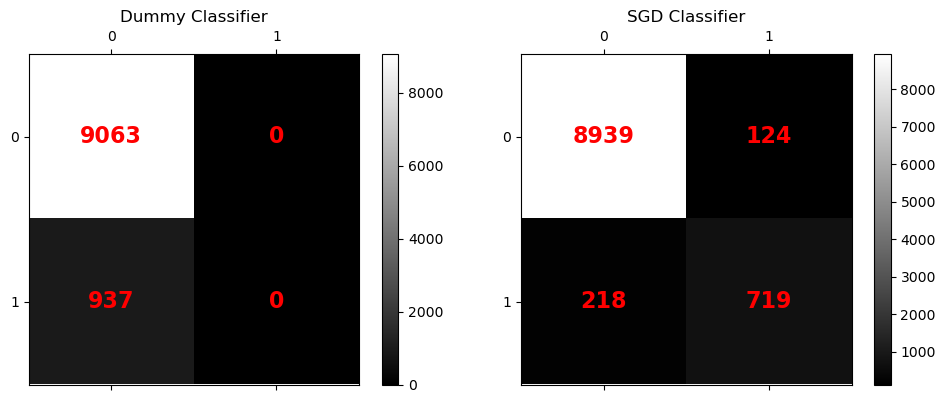

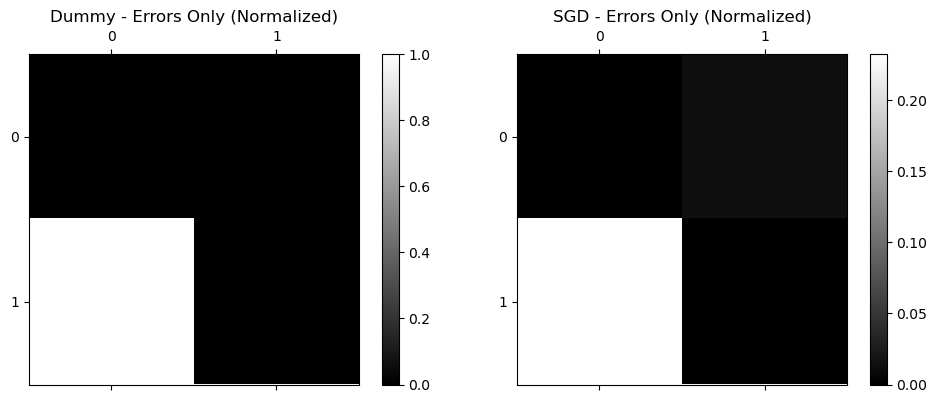

HOML Analysis:
Raw matrices show:
- Dummy: TN=9063, FP=0, FN=937, TP=0
- SGD: TN=8939, FP=124, FN=218, TP=719

Error-only matrices reveal:
- Dummy: 100% false negative rate (bright [1,0]) - misses ALL 5s
- SGD: Much lower error rates in both directions
- SGD finds most 5s (TP=719) with few false alarms (FP=124)

Key insight: SGD dramatically reduces false negatives while
keeping false positives low - much better than dummy baseline


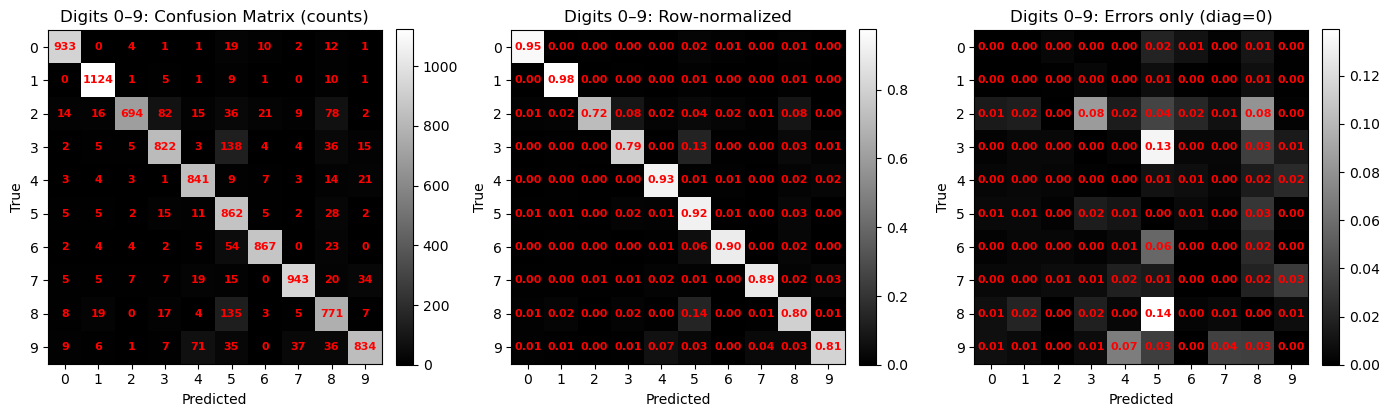


Top confusions (true → predicted, count):
3 → 5 : 138
8 → 5 : 135
2 → 3 : 82
2 → 8 : 78
9 → 4 : 71


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# HOML style confusion matrix visualization
print("HOML Style Heat Maps")
print("===================")

# Raw confusion matrices using matshow (HOML approach)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.matshow(M_dummy, cmap=plt.cm.gray, fignum=False)
plt.title('Dummy Classifier')
plt.colorbar()
# Add numbers on the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, M_dummy[i, j], ha="center", va="center", 
                color="red", fontsize=16, weight='bold')

plt.subplot(1, 2, 2)  
plt.matshow(M_sgd, cmap=plt.cm.gray, fignum=False)
plt.title('SGD Classifier')
plt.colorbar()
# Add numbers on the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, M_sgd[i, j], ha="center", va="center",
                color="red", fontsize=16, weight='bold')

plt.tight_layout()
plt.show()

# Normalize by row sums and focus on errors (HOML approach)
row_sums_dummy = M_dummy.sum(axis=1, keepdims=True)
norm_M_dummy = M_dummy / row_sums_dummy

row_sums_sgd = M_sgd.sum(axis=1, keepdims=True)
norm_M_sgd = M_sgd / row_sums_sgd

# Fill diagonal with zeros to keep only errors
norm_M_dummy_errors = norm_M_dummy.copy()
norm_M_sgd_errors = norm_M_sgd.copy()
np.fill_diagonal(norm_M_dummy_errors, 0)
np.fill_diagonal(norm_M_sgd_errors, 0)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.matshow(norm_M_dummy_errors, cmap=plt.cm.gray, fignum=False)
plt.title('Dummy - Errors Only (Normalized)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.matshow(norm_M_sgd_errors, cmap=plt.cm.gray, fignum=False)
plt.title('SGD - Errors Only (Normalized)')
plt.colorbar()

plt.tight_layout()
plt.show()

# HOML style analysis
print("HOML Analysis:")
print("==============")
print("Raw matrices show:")
print("- Dummy: TN=9063, FP=0, FN=937, TP=0")
print("- SGD: TN=8939, FP=124, FN=218, TP=719")
print()
print("Error-only matrices reveal:")
print("- Dummy: 100% false negative rate (bright [1,0]) - misses ALL 5s")
print("- SGD: Much lower error rates in both directions")
print("- SGD finds most 5s (TP=719) with few false alarms (FP=124)")
print()
print("Key insight: SGD dramatically reduces false negatives while")
print("keeping false positives low - much better than dummy baseline")

# 10×10 CONFUSION MATRIX (multiclass reuse of your data)
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

# Train a multiclass SGD on the original digit labels (0–9).
# Reuses your X_train/X_test/y_train/y_test (original labels, not the 5-vs-not5 booleans).
sgd_digits = SGDClassifier(random_state=42)
sgd_digits.fit(X_train, y_train)
y_pred_digits = sgd_digits.predict(X_test)

# Build 10×10 confusion matrices
labels = np.unique(y_test)  # keep dtype consistent (often strings)
cm10 = confusion_matrix(y_test, y_pred_digits, labels=labels)
cm10_norm = cm10.astype(float) / cm10.sum(axis=1, keepdims=True)

cm10_errors = cm10_norm.copy()
np.fill_diagonal(cm10_errors, 0.0)  # “errors only” view

def plot_cm(M, title, labels, annotate=True, vmin=None, vmax=None):
    plt.imshow(M, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(range(len(labels)), labels)
    plt.yticks(range(len(labels)), labels)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    if annotate:
        for i in range(M.shape[0]):
            for j in range(M.shape[1]):
                txt = f"{M[i,j]:.2f}" if M.dtype.kind == 'f' else f"{int(M[i,j])}"
                plt.text(j, i, txt, ha="center", va="center",
                         color="red", fontsize=8, weight='bold')

plt.figure(figsize=(14, 4.5))
plt.subplot(1,3,1); plot_cm(cm10,       "Digits 0–9: Confusion Matrix (counts)", labels)
plt.subplot(1,3,2); plot_cm(cm10_norm,  "Digits 0–9: Row-normalized",           labels)
plt.subplot(1,3,3); plot_cm(cm10_errors,"Digits 0–9: Errors only (diag=0)",     labels,
                            vmin=0.0, vmax=cm10_errors.max())
plt.tight_layout(); plt.show()

# Optional: show top confusions (largest off-diagonal entries)
off_diag = cm10.copy()
np.fill_diagonal(off_diag, 0)
pairs = np.dstack(np.unravel_index(np.argsort(off_diag, axis=None)[::-1], off_diag.shape))[0]
print("\nTop confusions (true → predicted, count):")
count = 0
for i, j in pairs:
    if off_diag[i, j] == 0: break
    print(f"{labels[i]} → {labels[j]} : {off_diag[i, j]}")
    count += 1
    if count >= 5: break


In this exercise, we extended the binary (2×2) confusion matrix to a full 10×10 version for the entire MNIST dataset (digits 0–9).
Each cell (i,j) represents how often images of the digit i were classified as digit j by the model.

Three visualizations were generated:
- Raw counts: shows the absolute number of predictions per class.
- Row-normalized matrix: shows prediction percentages relative to the true class, making it easier to compare performance across digits with different sample sizes.
- Error-only view (diagonal removed): highlights only the misclassifications, clearly showing where the model struggles.

The results show that the SGD classifier performs well overall, with most predictions concentrated on the diagonal.
However, some digits are frequently confused, especially:
- 3 → 5 (138 samples)
- 8 → 5 (135 samples)
- 2 → 3 and 2 → 8, which look visually similar in handwriting.

This visualization provides valuable insight into where the classifier fails, allowing for targeted model improvements.
The code and visualization approach are inspired by the method used in Hands-On Machine Learning (HOML), and implemented by the help of ChatGPT.

### Qe Conclusion

These exercises showed why accuracy alone isn't enough to evaluate classifiers. We built our own accuracy, precision, recall and F1 functions from scratch to understand what these metrics actually calculate.

The dummy classifier achieved 90% accuracy just by always guessing "not-5", which sounds impressive until you realize it never finds any 5s. This demonstrates the accuracy paradox - high accuracy can be misleading with imbalanced data.

Precision measures how many predicted positives are actually positive, while recall measures how many actual positives we found. The F1 score balances both. The dummy classifier had zero precision and recall because it never predicted positive.

Confusion matrices made these concepts visual. The HOML-style heat maps revealed error patterns clearly - the dummy classifier only made false negative errors, while SGD made both types but far fewer overall.

The key insight is that different metrics highlight different aspects of performance. In medical diagnosis, missing a disease (false negative) might be worse than a false alarm (false positive).